In [1]:
## Устанавливаем библиотеку

!pip install psycopg2-binary

In [2]:
## Проверка подключения к Neon.tech

from db_connection import DBConnection

conn = DBConnection.connect()
print("Connected successfully!")
conn.close()

Connected successfully!


In [3]:
## Удаляем старую таблицу
conn = DBConnection.connect()
cursor = conn.cursor()
cursor.execute("DROP TABLE IF EXISTS shipments;")
conn.commit()
cursor.close()
conn.close()
print("Old table 'shipments' dropped!")

## Создаём новую таблицу с нужной структурой под твой CSV
from db_setup import DBSetup
DBSetup.create_table()

Old table 'shipments' dropped!
Table 'shipments' created successfully!


In [4]:
## Загружаем CSV в Colab

from google.colab import files

## Загрузка файла с компьютера
uploaded = files.upload()


Saving supply_chain_data.csv to supply_chain_data.csv


In [5]:
## Импортируем CSV в таблицу

from data_import import DataImport

csv_path = "supply_chain_data.csv"
DataImport.import_csv_to_db(csv_path)

CSV 'supply_chain_data.csv' imported successfully!


In [6]:
from queries import Queries

df_all = Queries.get_all_shipments()
df_delayed = Queries.delayed_shipments(days=5)
df_orders = Queries.orders_by_route()
df_revenue = Queries.total_revenue()
df_transport = Queries.revenue_by_transport_mode()

/content/queries.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM shipments;', conn)
/content/queries.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f'''
/content/queries.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''
/content/queries.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


/content/queries.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM shipments;', conn)
/content/queries.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f'''
/content/queries.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('''
/content/queries.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


Все данные:
    sku      price  number_sold      revenue  shipping_time  shipping_cost  \
0  SKU0  69.808006          802  8661.996792              4       2.956572   
1  SKU1  14.843523          736  7460.900065              2       9.716575   
2  SKU2  11.319683            8  9577.749626              2       8.054479   
3  SKU3  61.163343           83  7766.836426              6       1.729569   
4  SKU4   4.805496          871  2686.505152              8       3.890548   

  transport_mode    route  
0           Road  Route B  
1           Road  Route B  
2            Air  Route C  
3           Rail  Route A  
4            Air  Route A  

Заказы с задержкой доставки > 5 дней:
     sku      price  number_sold      revenue  shipping_time  shipping_cost  \
0   SKU3  61.163343           83  7766.836426              6       1.729569   
1   SKU4   4.805496          871  2686.505152              8       3.890548   
2   SKU6   4.078333           65  7823.476560              8       3.880763

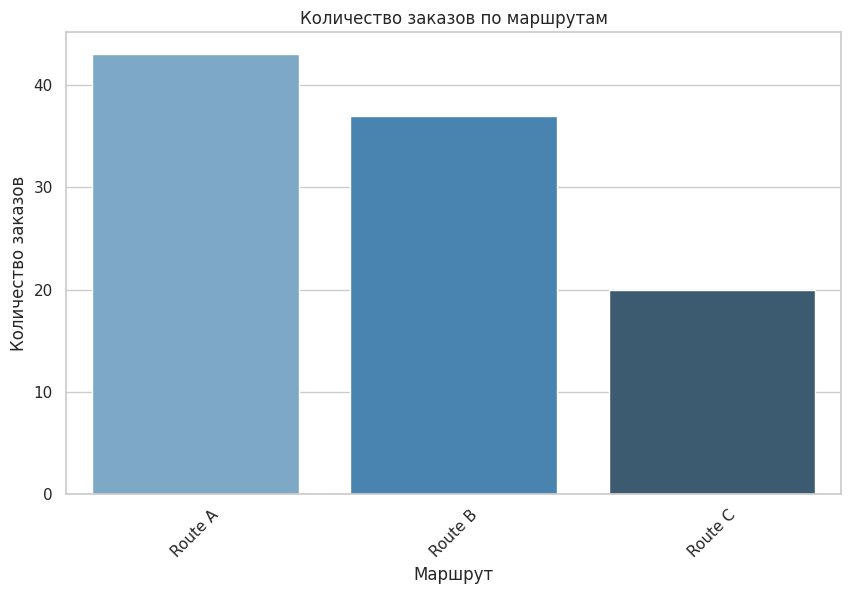


Суммарная выручка:
   total_revenue
0  577604.818738


/tmp/ipython-input-2774356339.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_transport, x='transport_mode', y='total_revenue', palette='Greens_d')


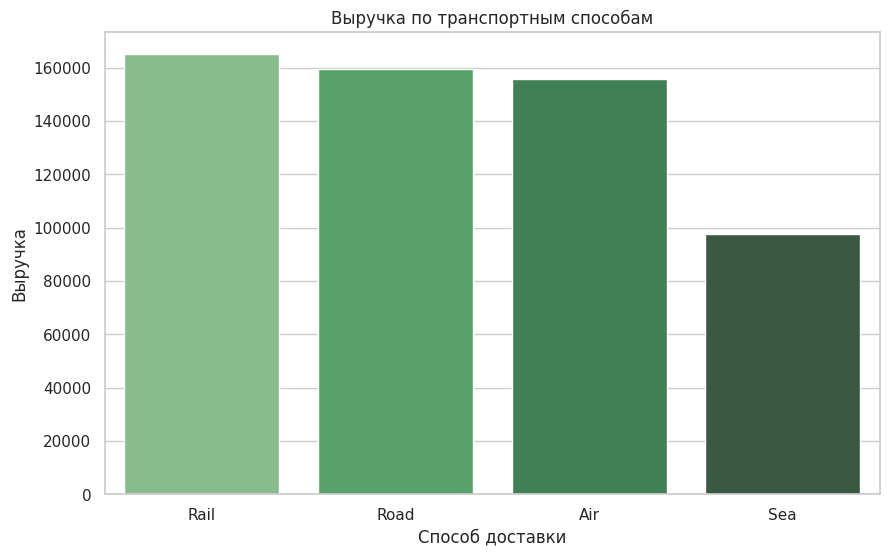

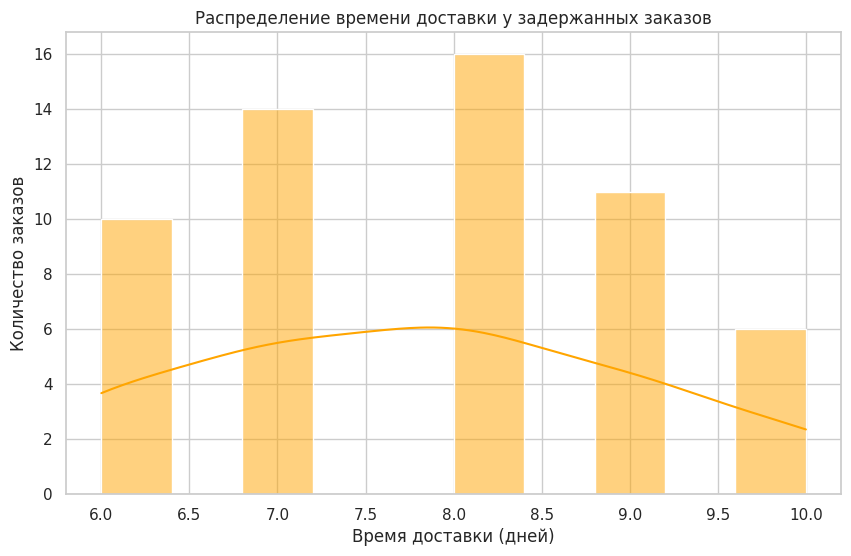

In [7]:
## Импортируем необходимые модули
import matplotlib.pyplot as plt
import seaborn as sns
from queries import Queries

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Получаем данные
df_all = Queries.get_all_shipments()
df_delayed = Queries.delayed_shipments(days=5)
df_orders = Queries.orders_by_route()
df_revenue = Queries.total_revenue()
df_transport = Queries.revenue_by_transport_mode()

## Все данные (первые 5 строк)
print("Все данные:")
print(df_all.head())

## Заказы с задержкой доставки > 5 дней
print("\nЗаказы с задержкой доставки > 5 дней:")
print(df_delayed.head())

## Количество заказов по маршрутам (график)
plt.figure()
sns.barplot(data=df_orders, x='route_name', y='total_orders', palette='Blues_d')
plt.title("Количество заказов по маршрутам")
plt.xlabel("Маршрут")
plt.ylabel("Количество заказов")
plt.xticks(rotation=45)
plt.show()

## Суммарная выручка
print("\nСуммарная выручка:")
print(df_revenue)

## Выручка по транспортным способам (график)
plt.figure()
sns.barplot(data=df_transport, x='transport_mode', y='total_revenue', palette='Greens_d')
plt.title("Выручка по транспортным способам")
plt.xlabel("Способ доставки")
plt.ylabel("Выручка")
plt.show()

## Заказы с задержкой > 5 дней (гистограмма)
if not df_delayed.empty:
    plt.figure()
    sns.histplot(df_delayed['shipping_time'], bins=10, kde=True, color='orange')
    plt.title("Распределение времени доставки у задержанных заказов")
    plt.xlabel("Время доставки (дней)")
    plt.ylabel("Количество заказов")
    plt.show()
else:
    print("Нет заказов с задержкой более 5 дней.")